In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

StatementMeta(sparkpool, 1, 2, Finished, Available)

In [2]:
%%pyspark
df = spark.read.options(delimiter=",", header=True).csv('abfss://fsaccjgd@accjgddatalake.dfs.core.windows.net/banana_quality.csv')
display(df.limit(10))

StatementMeta(sparkpool, 1, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, b2799455-8ba4-4154-99b0-597051b17e59)

In [3]:
df = df.toPandas()
df.info()
     

StatementMeta(sparkpool, 1, 4, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Size         8000 non-null   object
 1   Weight       8000 non-null   object
 2   Sweetness    8000 non-null   object
 3   Softness     8000 non-null   object
 4   HarvestTime  8000 non-null   object
 5   Ripeness     8000 non-null   object
 6   Acidity      8000 non-null   object
 7   Quality      8000 non-null   object
dtypes: object(8)
memory usage: 500.1+ KB


In [4]:
for col in df.columns:
    if not col == "Quality":
        df[col] = df[col].astype('float32')

StatementMeta(sparkpool, 1, 5, Finished, Available)

In [5]:
df.info()

StatementMeta(sparkpool, 1, 6, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float32
 1   Weight       8000 non-null   float32
 2   Sweetness    8000 non-null   float32
 3   Softness     8000 non-null   float32
 4   HarvestTime  8000 non-null   float32
 5   Ripeness     8000 non-null   float32
 6   Acidity      8000 non-null   float32
 7   Quality      8000 non-null   object 
dtypes: float32(7), object(1)
memory usage: 281.4+ KB


In [6]:
df.describe()

StatementMeta(sparkpool, 1, 7, Finished, Available)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434021,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249033,7.411633


StatementMeta(sparkpool, 1, 8, Finished, Available)

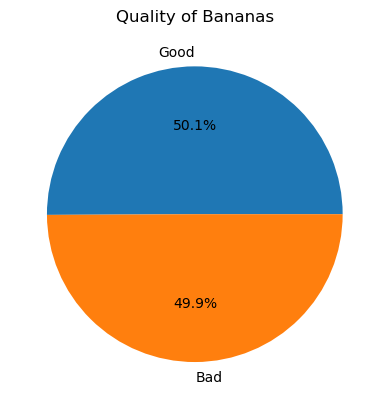

In [7]:
# pie chart Quality
quality = df['Quality'].value_counts()
quality

plt.pie(quality, labels=quality.index, autopct='%1.1f%%')
plt.title('Quality of Bananas')
plt.show()

StatementMeta(sparkpool, 1, 9, Finished, Available)

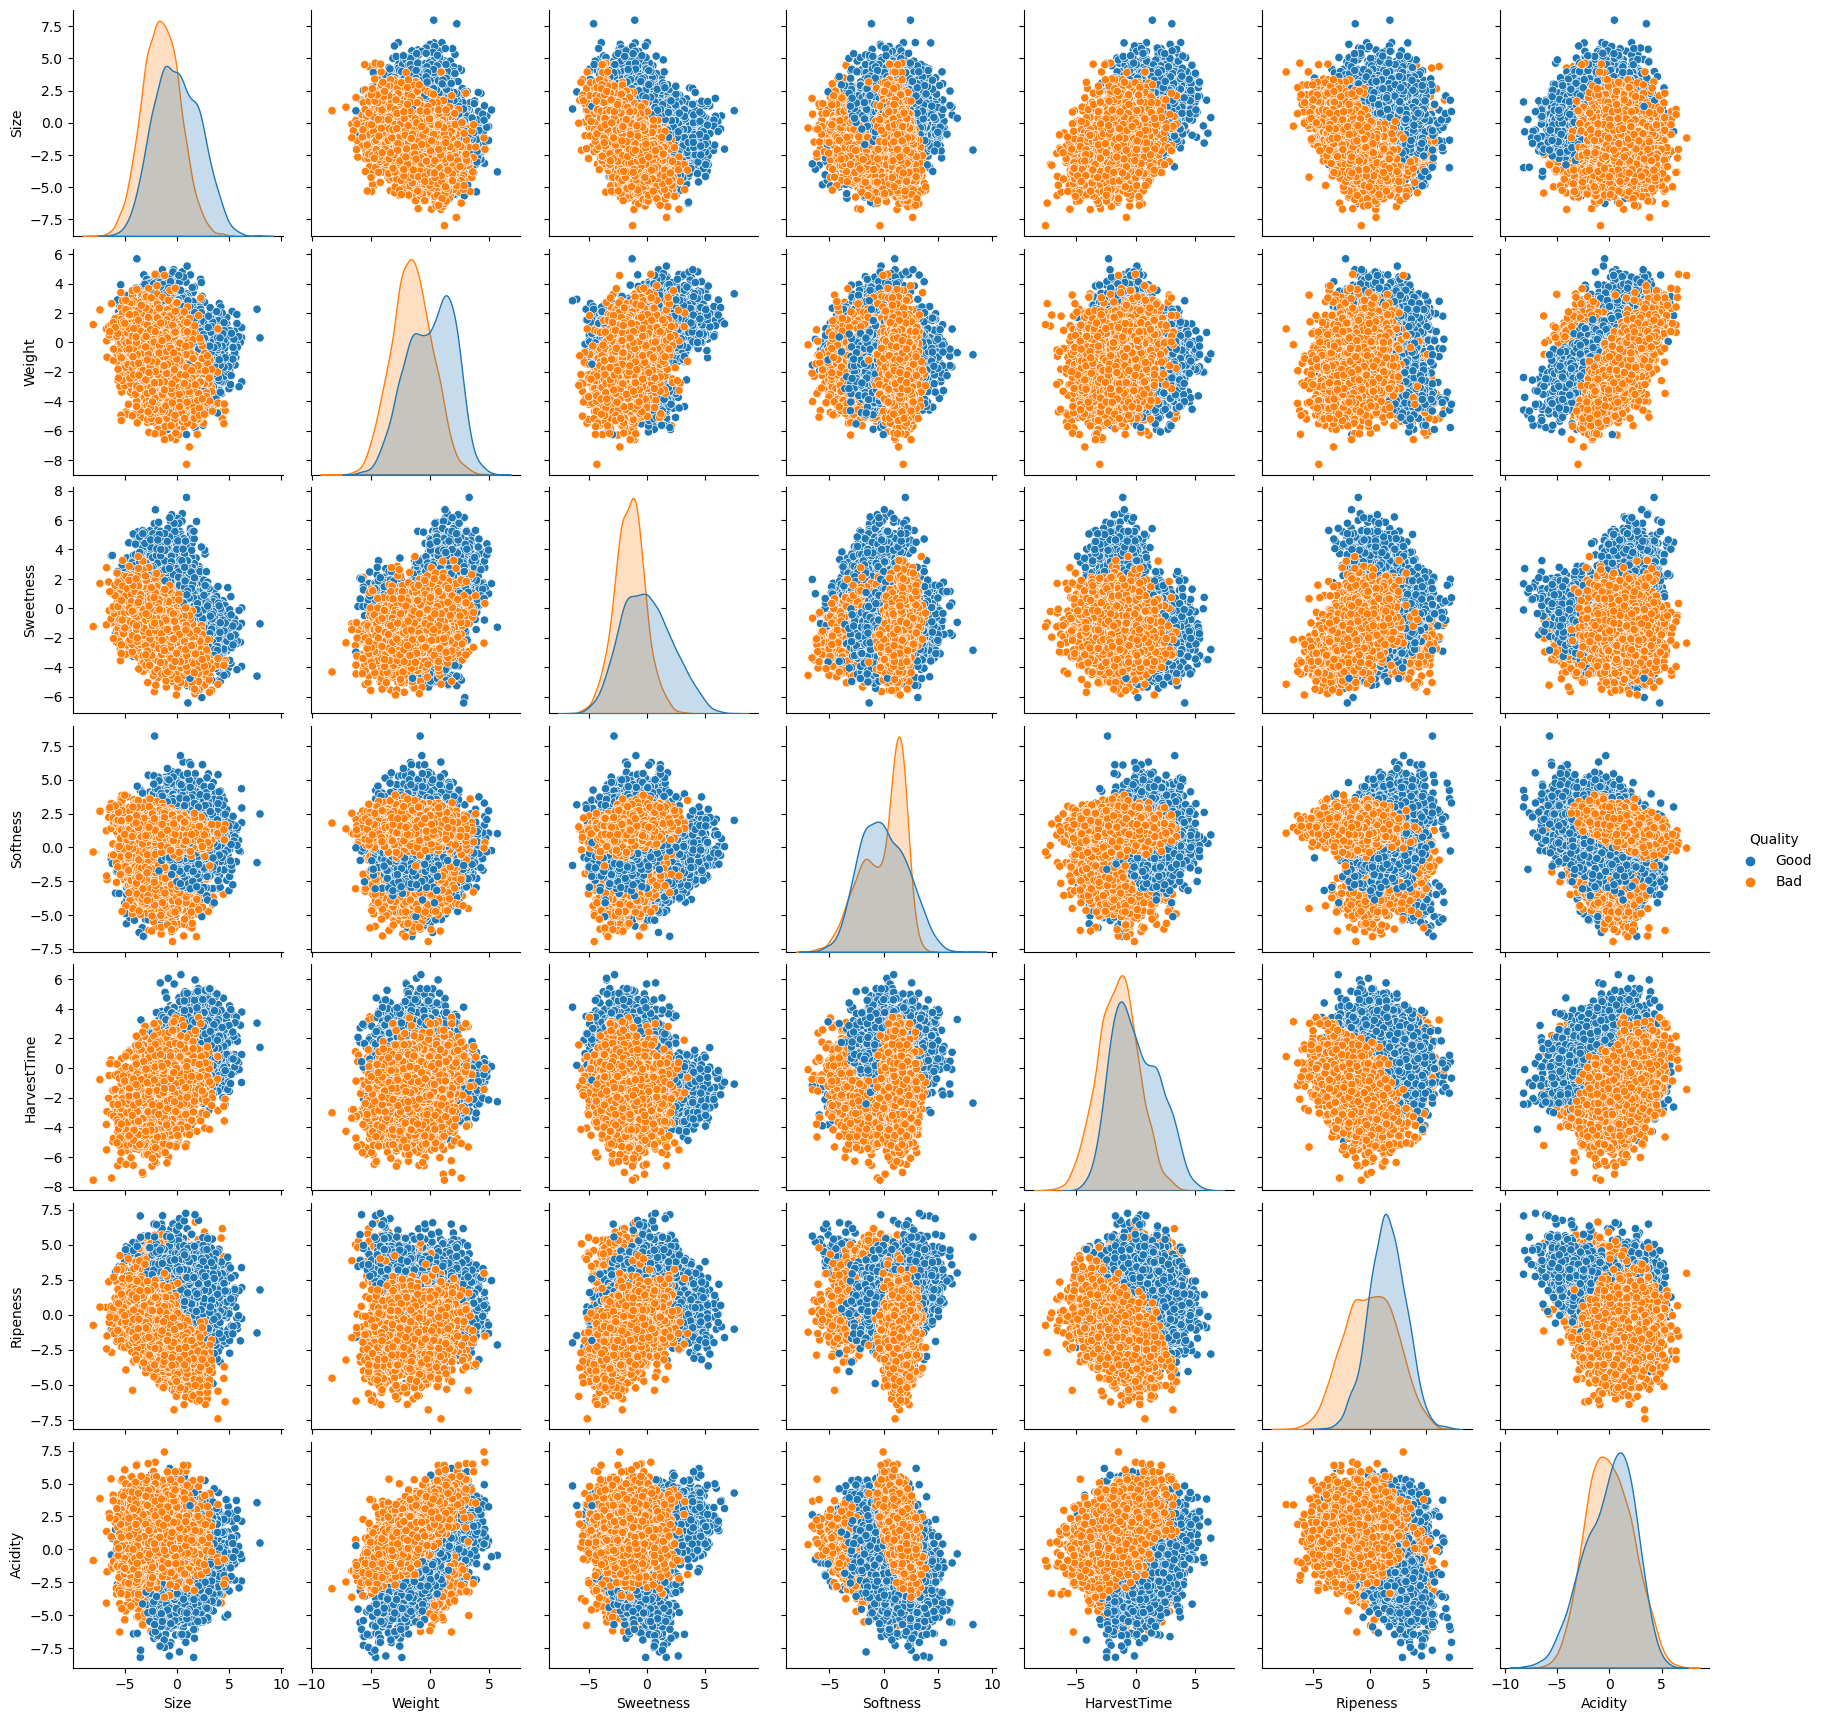

In [8]:
sns.pairplot(df, hue='Quality')
plt.show()

StatementMeta(sparkpool, 1, 10, Finished, Available)

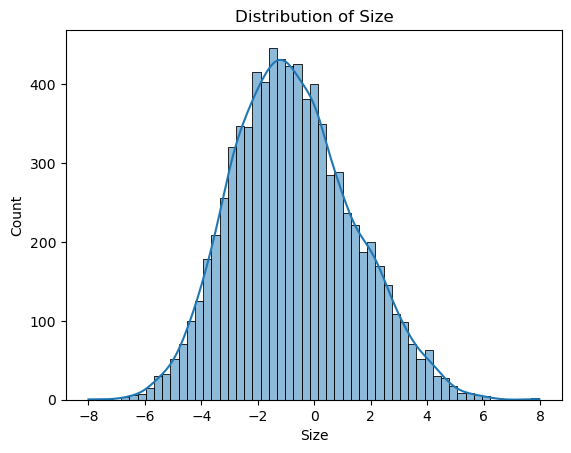

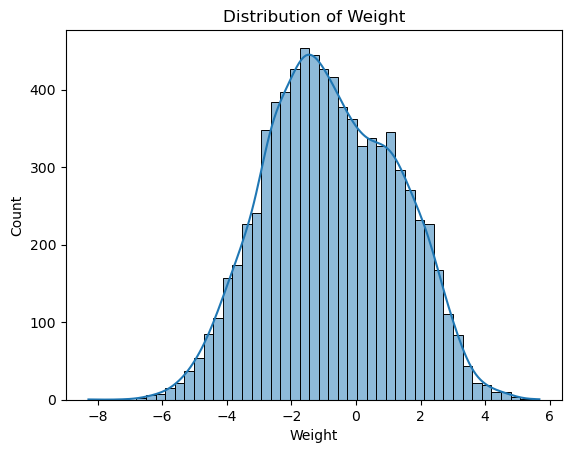

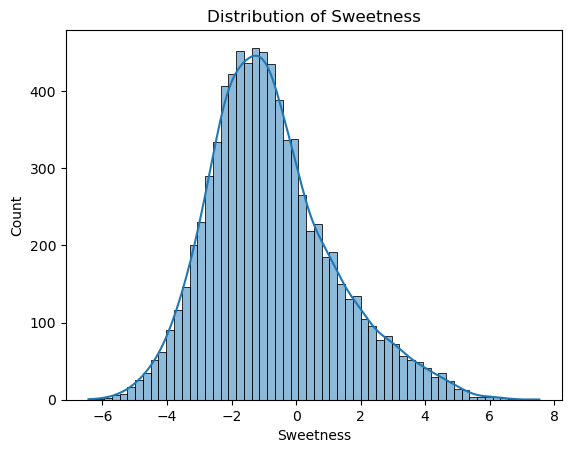

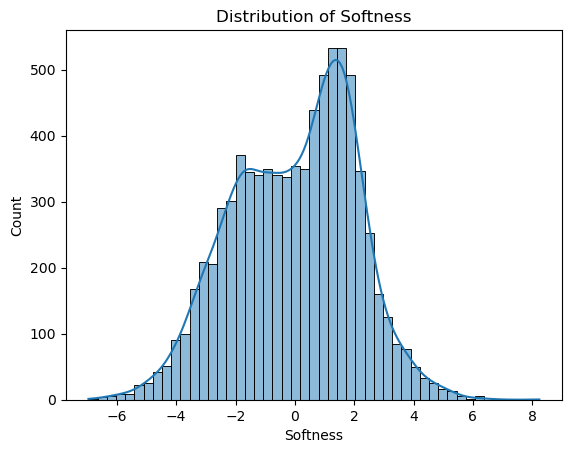

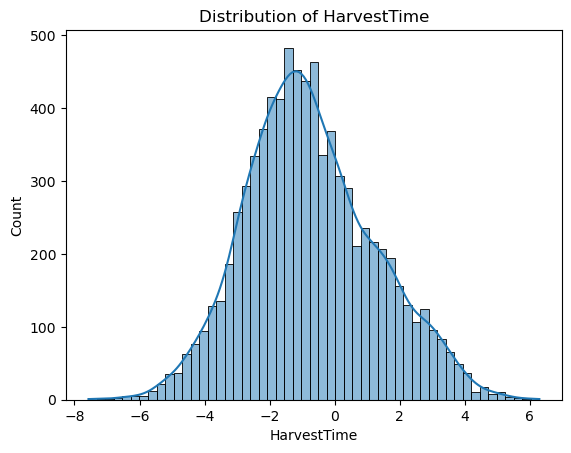

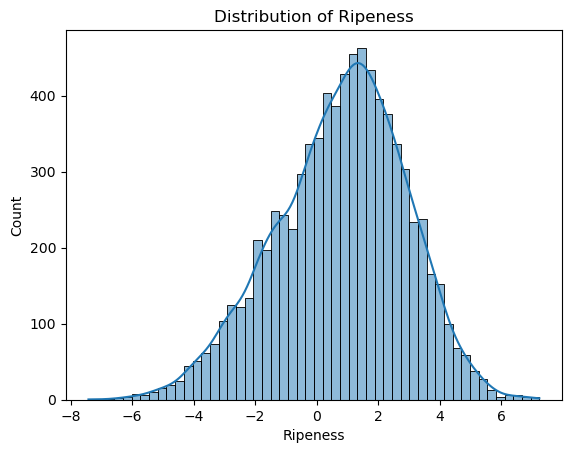

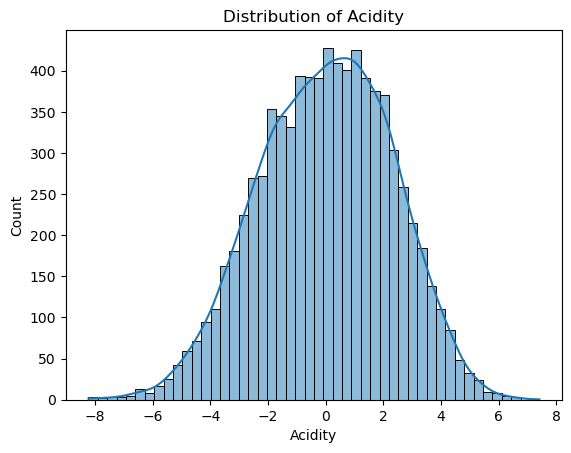

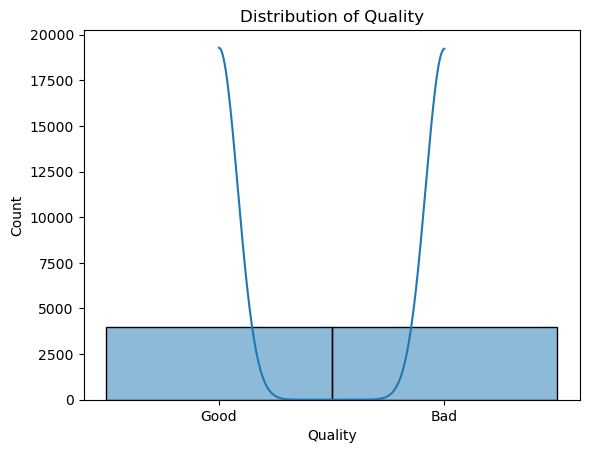

In [9]:
for feature in df.columns:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [10]:
# change the quality to 0 and 1
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})
df.head()

StatementMeta(sparkpool, 1, 11, Finished, Available)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868523,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


StatementMeta(sparkpool, 1, 12, Finished, Available)

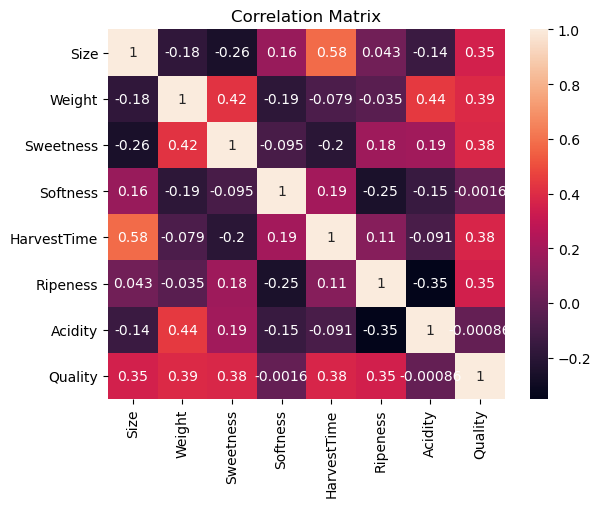

In [11]:
# correlation
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
df_spark = spark.createDataFrame(df)
df_spark

StatementMeta(sparkpool, 1, 13, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


DataFrame[Size: float, Weight: float, Sweetness: float, Softness: float, HarvestTime: float, Ripeness: float, Acidity: float, Quality: bigint]

In [13]:
display(df_spark.limit(10))

StatementMeta(sparkpool, 1, 14, Finished, Available)

SynapseWidget(Synapse.DataFrame, c5b47d8b-4eff-48e4-9517-cc300215aef5)

In [14]:
df_spark.coalesce(1).write.format("csv").options(header="true", delimiter=",").mode("overwrite").save('abfss://fsaccjgd@accjgddatalake.dfs.core.windows.net/banana_quality_clean.csv')
     

StatementMeta(sparkpool, 1, 15, Finished, Available)